@grion_coherence_2016 published raw data and figure on Figshare ^[ Link to source data: <http://figshare.com/s/99b31b8a567f11e5b81d06ec4bbcf141> ].

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
from scipy import signal
import os
import pandas as pd

In [4]:
DATA_DIR = "./../../data/1536795"
BEHAVIOR_FILE = "Behavior.mat"
SPIKES_FILE = "Spikes.mat"

In [5]:
rat = "R1"

## Exploring local field potential (LFP) data


In [6]:
def load_lfp(rat, session, folder):
    filepath = os.path.join(folder, f"{rat}_lfp", f"Lfp_sess{session}.mat")
    return sio.loadmat(filepath)

In [7]:
lfp_sess1 = load_lfp(rat, 1, DATA_DIR)

In [8]:
lfp_sess1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Lfp'])

In [9]:
lfp_sess1['Lfp']

array([[(array([[1]], dtype=uint8), array([[1]], dtype=uint8), array([[2003]], dtype=uint16), array([[-354],
               [-361],
               [-327],
               ...,
               [-379],
               [-380],
               [-379]], dtype=int16), array([[ 138.076363  ],
               [ 138.07686225],
               [ 138.0773615 ],
               ...,
               [1891.00331482],
               [1891.00381407],
               [1891.00431332]]))                                                                           ]],
      dtype=[('rat', 'O'), ('session', 'O'), ('sr', 'O'), ('voltage', 'O'), ('timestamps', 'O')])

### Plotting LFP Signal

In [10]:
lfp_sess1['Lfp'][0][0]

(array([[1]], dtype=uint8), array([[1]], dtype=uint8), array([[2003]], dtype=uint16), array([[-354],
       [-361],
       [-327],
       ...,
       [-379],
       [-380],
       [-379]], dtype=int16), array([[ 138.076363  ],
       [ 138.07686225],
       [ 138.0773615 ],
       ...,
       [1891.00331482],
       [1891.00381407],
       [1891.00431332]]))

In [11]:
lfp_sess1['Lfp'].dtype

dtype([('rat', 'O'), ('session', 'O'), ('sr', 'O'), ('voltage', 'O'), ('timestamps', 'O')])

In [12]:
samplerate = lfp_sess1['Lfp']['sr'][0][0][0][0]
voltage = lfp_sess1['Lfp']['voltage'][0][0]
timestamps = lfp_sess1['Lfp']['timestamps'][0][0]


### Plotting LFP Data

In [13]:
print(samplerate)

2003


In [14]:
t_ms = timestamps - np.min(timestamps)
initial_time_interval = t_ms < 1

In [18]:
print("Sampling frequency is", samplerate, "Hz.")
print("Total duration of recording is", "%2.3f" % (t_ms[-1] // 1000), "seconds.")
print("Dimension of data are", voltage.shape, "data points.")


Sampling frequency is 2003 Hz.
Total duration of recording is 1.000 seconds.
Dimension of data are (3486720, 1) data points.


Text(0.5, 1.0, 'Initial interval of LFP data')

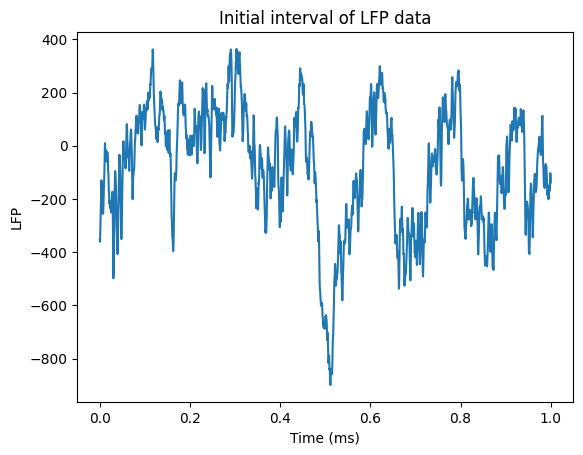

In [19]:
#| fig-caption: First 1 ms of LFP data for rat 1, session 1
#| fig-label: R1-lfp-sess1-1ms
plt.plot(t_ms[initial_time_interval], voltage[initial_time_interval])
plt.xlabel('Time (ms)')
plt.ylabel('LFP')
plt.title('Initial interval of LFP data')

## Is the data clean?

Text(0.5, 1.0, 'LFP data')

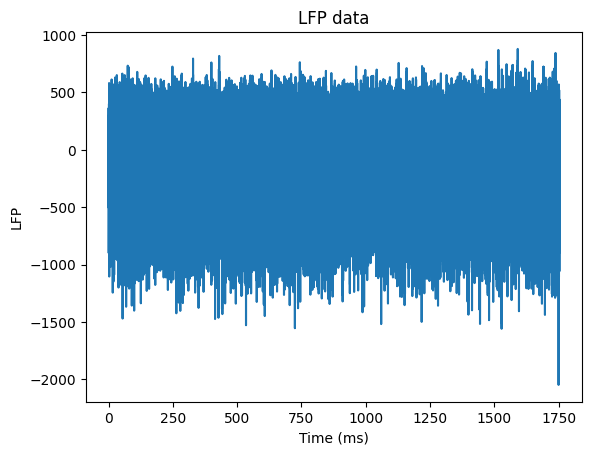

In [20]:
plt.figure()
plt.plot(t_ms, voltage)
plt.xlabel('Time (ms)')
plt.ylabel('LFP')
plt.title('LFP data')

## References

- `scipy.signal.cwt` Scipy documentation: <https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.cwt.html>
- *Python for the practicing neuroscientist* : <https://mark-kramer.github.io/Case-Studies-Python/01.html>
